In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
from IPython.display import Image, display


In [4]:
print(os.getcwd())

/sc/home/masoumeh.javanbakhat/netstore-old/Baysian/3D/Computer_Vision_New


In [5]:
# load csv file 
path_csv = Path(os.getcwd()) / 'runs'/'detect'/'runs01'/ 'kitti_exp5' / 'results.csv'

df = pd.read_csv(path_csv)

In [6]:
df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,170.000,1.41786,1.72030,1.09020,0.70670,0.28024,0.44568,0.24018,1.30230,1.86522,1.03762,0.000472,0.000472,0.000472
1,2,339.042,1.27431,1.05276,1.04577,0.53358,0.45033,0.42980,0.22683,1.31370,1.00909,1.07770,0.000901,0.000901,0.000901
2,3,508.041,1.26653,0.94507,1.05187,0.71765,0.43886,0.51842,0.27725,1.25980,1.12564,1.07432,0.001283,0.001283,0.001283
3,4,676.997,1.24194,0.88382,1.04678,0.67627,0.48587,0.53072,0.29520,1.21402,0.86197,1.05503,0.001217,0.001217,0.001217
4,5,845.534,1.18895,0.81812,1.02487,0.71548,0.50452,0.58803,0.32372,1.14061,0.79233,1.03172,0.001146,0.001146,0.001146


In [7]:
df[["metrics/mAP50(B)", "metrics/mAP50-95(B)"]].iloc[-1]

metrics/mAP50(B)       0.77440
metrics/mAP50-95(B)    0.50582
Name: 19, dtype: float64

- The precesion and recall on training incresaes as number of epochs increases. 
- The loss values (box_loss, cls_loss, dfl_loss) deacres as number of epochs increseases both on training and validation loss. 
- mAP50 and mAP50-95 increases as number of epochs increseases.  

#### Confusion Matrix:

- car : 89% of cars are detected.11% of cars are predicted as background. 
- pedistrain: 63% of pedistrain were detected. 1% of the times pedistrains are detcted as cyclist, 
  - and 22% of the times they are dectected as background.
- cyclist: 63% of cyclists were dettected. Cyclists 1% of the time are categorised as pedistrain.and 35% of the time they are categorised as backgrond.  

- 🚗 Car

- 89% detected

- 11% missed

- 🚶 Pedestrian

- 63% detected

- 1% confused with cyclist

- 22% missed

- 🚴 Cyclist

- 63% detected

- 1% confused with pedestrian

- 35% missed

| Class         | Correctly Detected | Confused With Other Class | Missed (Background) |
| ------------- | ------------------ | ------------------------- | ------------------- |
| 🚗 Car        | **89%**            | —                         | 11%                 |
| 🚶 Pedestrian | **63%**            | 1% → Cyclist              | 22%                 |
| 🚴 Cyclist    | **63%**            | 1% → Pedestrian           | 35%                 |

### Error Analysis

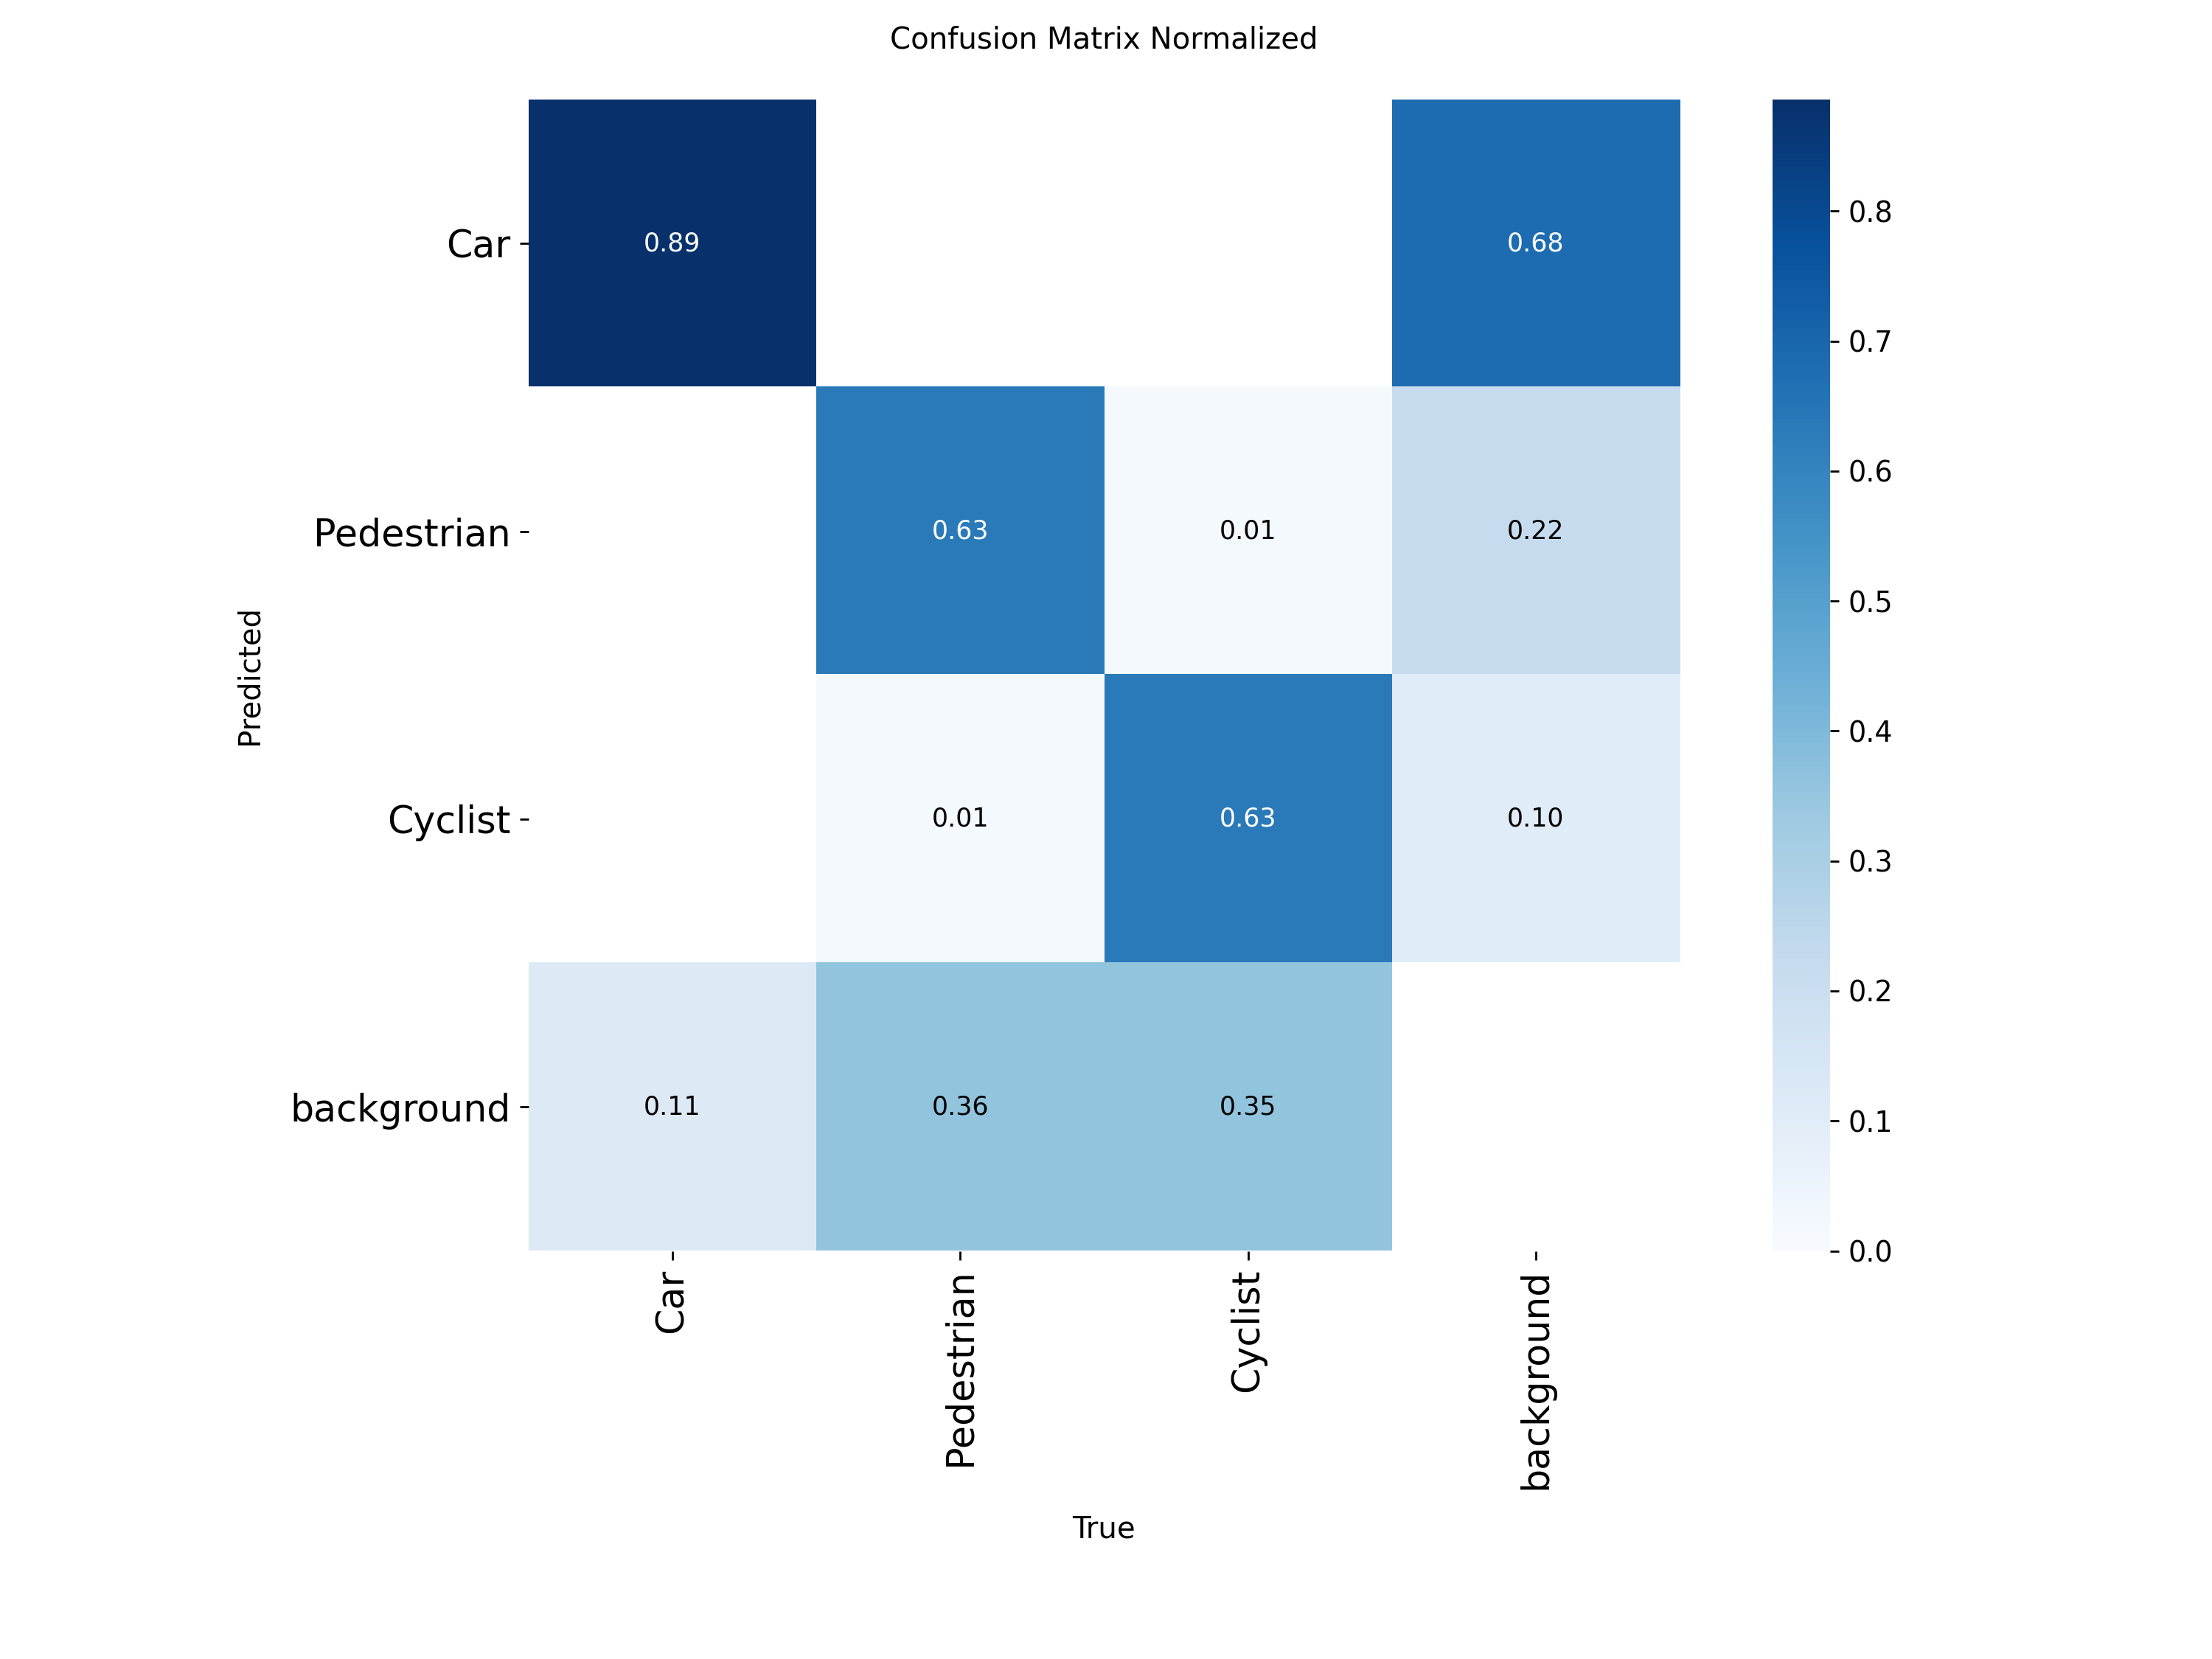

In [9]:
path_conf = Path(os.getcwd()) / 'runs'/'detect'/'runs01'/ 'kitti_exp5' / 'confusion_matrix_normalized.png'

display(Image(filename=path_conf))


A confusion matrix is one of the most useful tools for **error analysis** in object detection.

It helps you understand **what kinds of mistakes your model makes**, not just how accurate it is.

---

#### 🎯 Why use a confusion matrix?

Metrics like mAP tell you:

✔ overall performance

But they don’t tell you:

❌ what the model confuses
❌ what it misses
❌ which classes are hardest

👉 The confusion matrix answers these.

---

#### 🧠 What error analysis means

Error analysis = understanding **where and why the model fails** so you can improve it.

---

#### 🎯 What the confusion matrix reveals

#### ✅ 1️⃣ Missed detections (false negatives)

Look at the **background row**.

Example from yours:

* 22% pedestrians missed
* 35% cyclists missed

👉 Model struggles with small objects.

---

#### ✅ 2️⃣ Class confusion

Off-diagonal values show confusion.

Example:

* pedestrians → cyclists (~1%)
* cyclists → pedestrians (~1%)

👉 class definitions are clear → low confusion ✔

---

#### ✅ 3️⃣ Strong classes

Diagonal values show strengths:

* cars detected very well (89%)

---

#### 🎯 What insights we can gain

##### ✔ If background row is high

→ model misses objects
→ improve recall

##### ✔ if classes confuse each other

→ improve class distinction
→ better labels or features

##### ✔ if one class is weak

→ dataset imbalance
→ insufficient examples

---

#### 📊 Your matrix tells us:

##### 🚗 Car

✔ strong detection
✔ easy class

##### 🚶 Pedestrian

⚠ moderate recall
⚠ small & occluded objects

##### 🚴 Cyclist

⚠ most difficult class
⚠ many missed detections

👉 This pattern is normal for KITTI.

---

#### 🎯 How to use this for improvement

##### If many objects are missed:

✔ increase image resolution
✔ train longer
✔ use larger model
✔ improve augmentation

---

#### If classes confuse each other:

✔ check labels
✔ add more samples
✔ refine classes

---

##### If one class underperforms:

✔ balance dataset
✔ oversample rare classes

---

#### 🧠 Confusion matrix vs other tools

| Tool              | Purpose                      |
| ----------------- | ---------------------------- |
| mAP               | overall performance          |
| PR curve          | precision vs recall tradeoff |
| confusion matrix  | error types                  |
| validation images | visual errors                |

All are complementary.

---



✅ confusion matrices are used for **error analysis**.
They help we understand:

✔ what is missed?
✔ what is confused?
✔ which classes are weak?

## Steps to Improve Results:

 - **Step 1**: Increasing Resultion from  `640` to `832` => Improving mAP50 from **77%** to **82%** => **5%** improvement 

 - **Step 2**: Longer training + Larger model (YOLOv8s) => Improving mAP50 from **82%** to **93%**=> **11%** improvemnet 

### Training Model with higher image resultion 

In [3]:
# load csv file 
path_csv = Path(os.getcwd()) / 'runs'/'detect'/'runs01'/ 'kitti_exp12' / 'results.csv'

df = pd.read_csv(path_csv)

In [4]:
df[["metrics/mAP50(B)", "metrics/mAP50-95(B)"]].iloc[-1]

metrics/mAP50(B)       0.82007
metrics/mAP50-95(B)    0.55214
Name: 19, dtype: float64

| chnage      | improve ment   | mAP  | per class accuracy      | 
| imgsize=832 | very sucessful | 82%  | car=92%,ped=63%,cyc=73% |

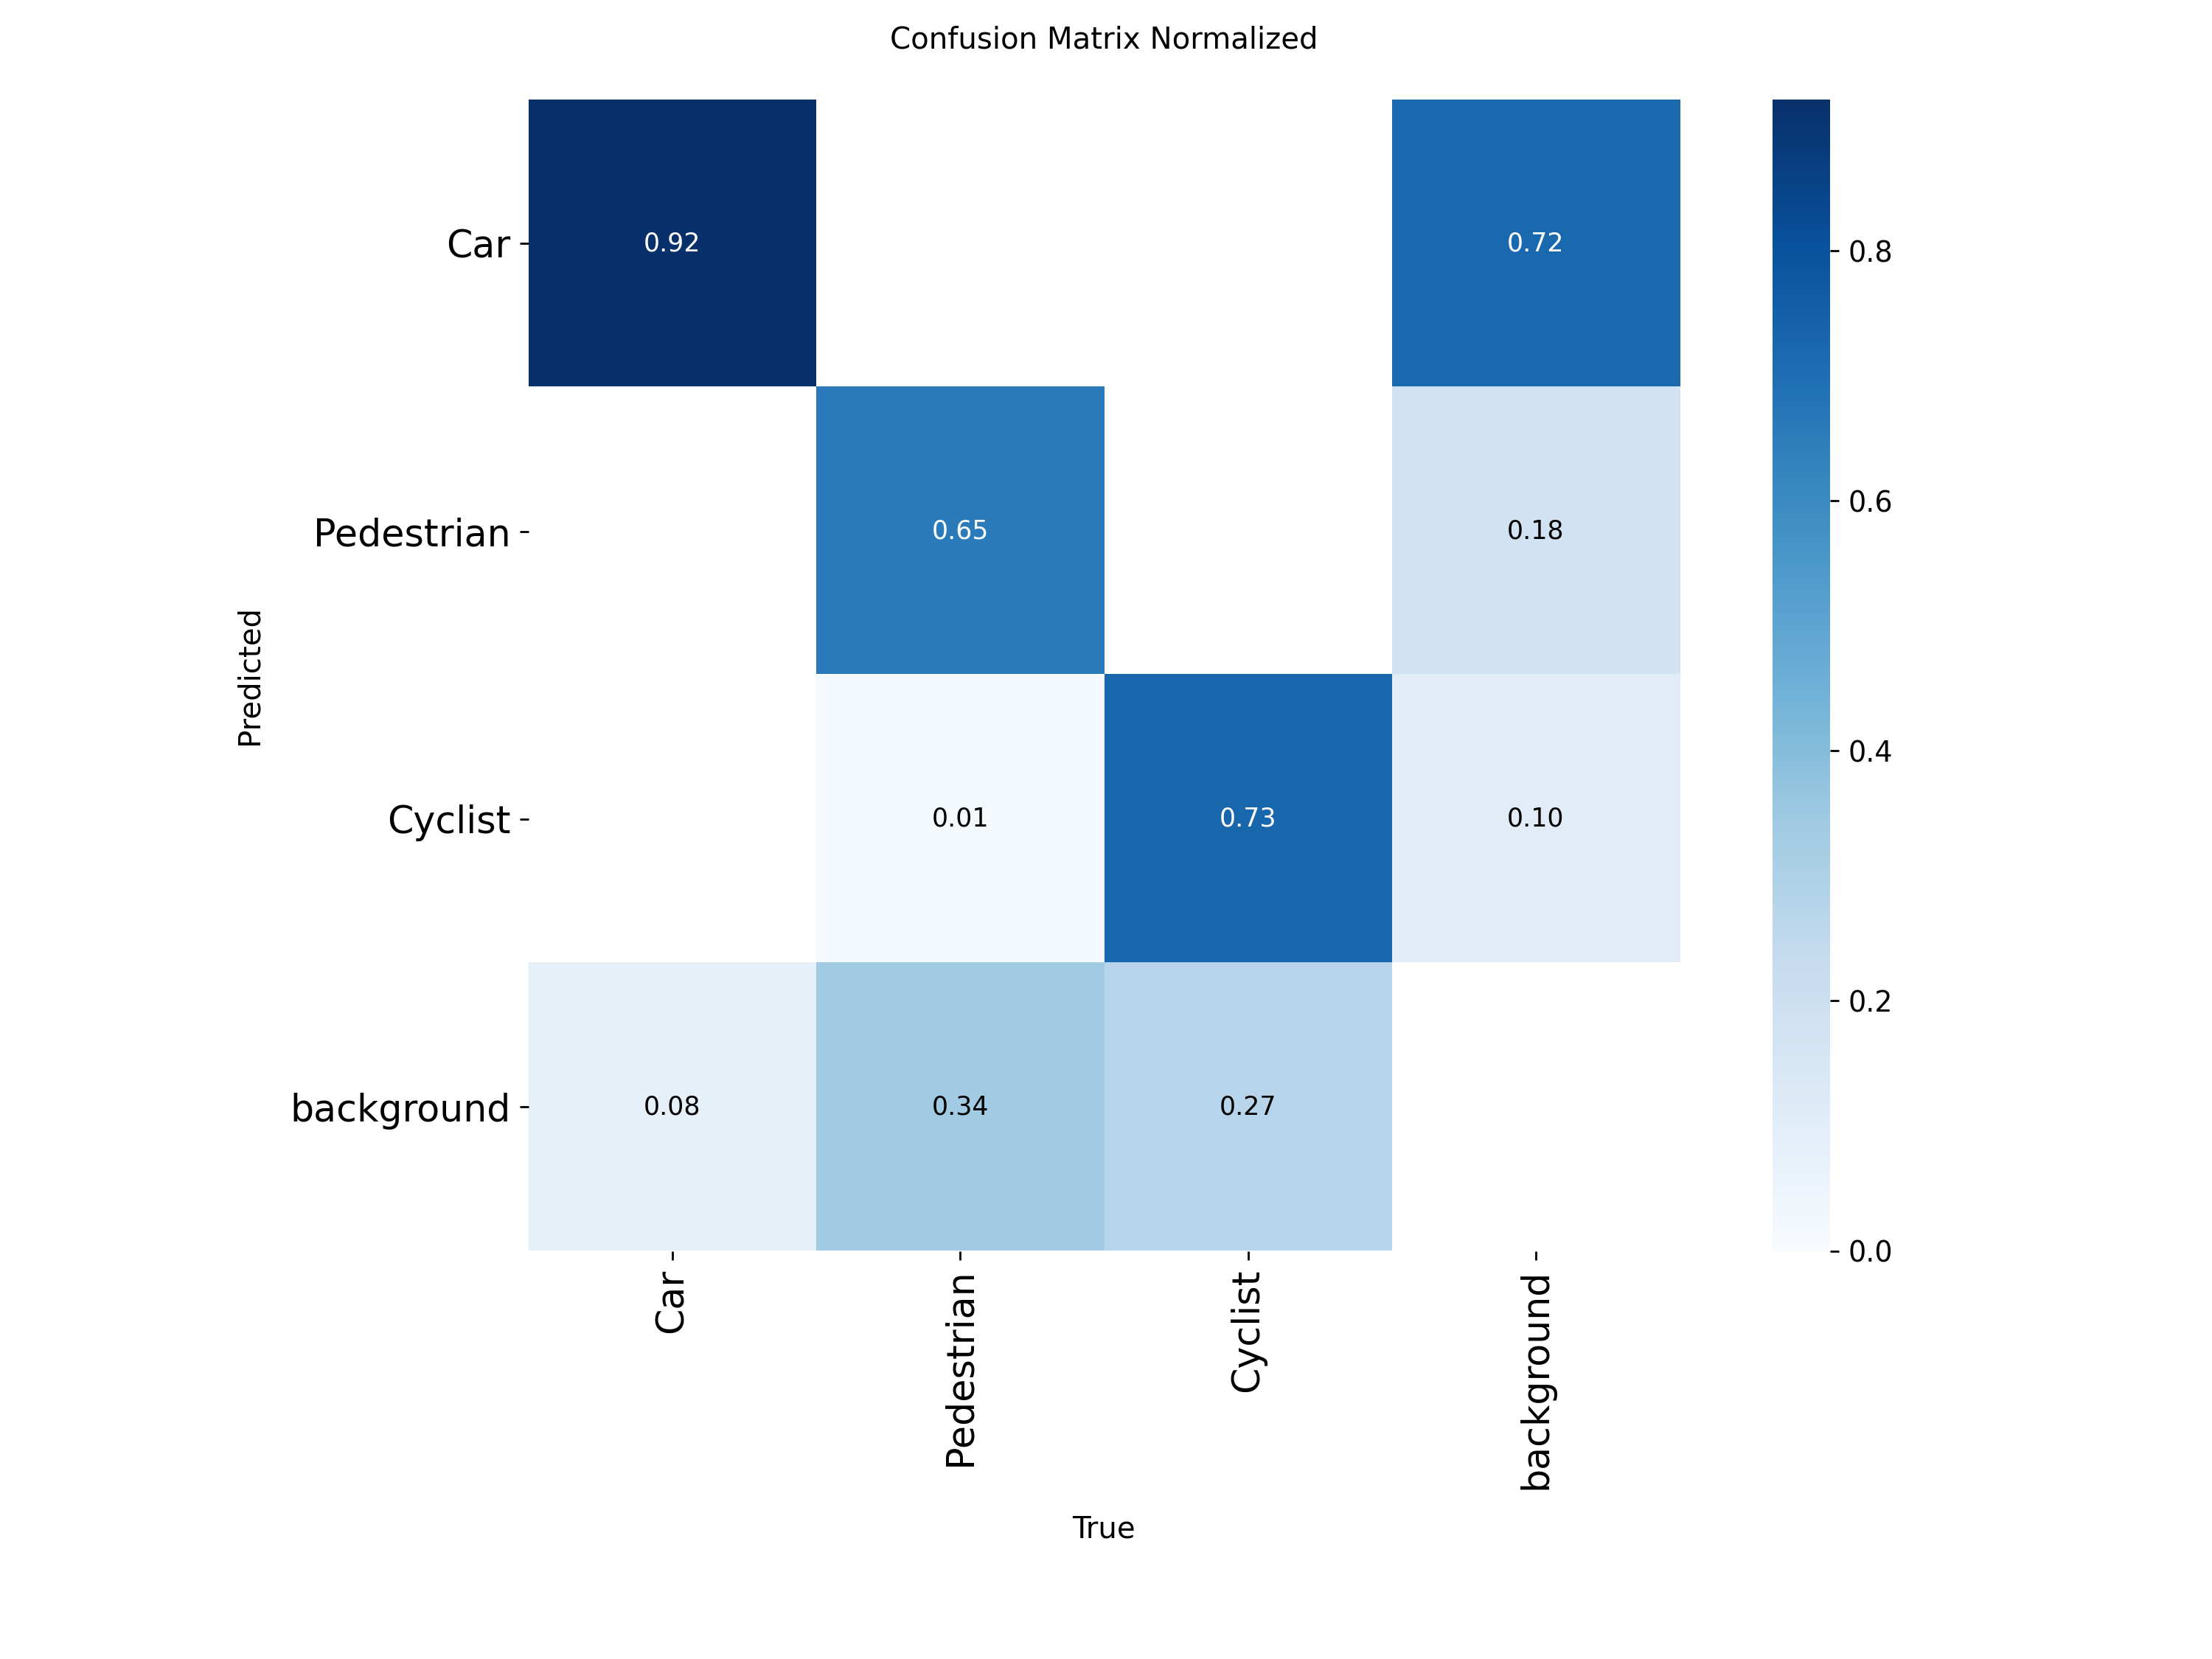

In [10]:
path_conf = Path(os.getcwd()) / 'runs'/'detect'/'runs01'/ 'kitti_exp12' / 'confusion_matrix_normalized.png'

display(Image(filename=path_conf))

### Training model for longer time and Larger model

 - Changing model from YOLOn to YOLOs
 - Increasing number of epochs from 20 to 82 

In [3]:
path_csv = Path(os.getcwd()) / 'runs'/'detect'/'runs01'/ 'kitti_exp15' / 'results.csv'

df_exp15 = pd.read_csv(path_csv)

In [6]:
df_exp15.tail()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,lr/pg3,lr/pg4,lr/pg5,lr/pg6,lr/pg7
77,78,16871.8,0.54110,0.32351,0.84597,0.93610,0.86990,0.93556,0.71426,0.58134,0.32518,0.87715,0.007131,0.002377,0.007131,0.002377,0.007131,0.002377,0.007131,0.002377
78,79,17088.7,0.53740,0.32040,0.84618,0.92665,0.88532,0.93837,0.71868,0.57971,0.32529,0.87606,0.006834,0.002278,0.006834,0.002278,0.006834,0.002278,0.006834,0.002278
79,80,17307.1,0.53612,0.32043,0.84499,0.93375,0.88101,0.93882,0.72103,0.57750,0.32511,0.87512,0.006537,0.002179,0.006537,0.002179,0.006537,0.002179,0.006537,0.002179
80,81,17524.2,0.53178,0.31725,0.84248,0.92590,0.88411,0.93674,0.72138,0.57532,0.32386,0.87554,0.006240,0.002080,0.006240,0.002080,0.006240,0.002080,0.006240,0.002080
81,82,17741.1,0.53236,0.31784,0.84477,0.93489,0.87521,0.93615,0.72238,0.57408,0.32333,0.87438,0.005943,0.001981,0.005943,0.001981,0.005943,0.001981,0.005943,0.001981


In [7]:
df_exp15[["metrics/mAP50(B)", "metrics/mAP50-95(B)"]].iloc[-1]

metrics/mAP50(B)       0.93615
metrics/mAP50-95(B)    0.72238
Name: 81, dtype: float64

### Summery of Improvements

| Change                         | mAP50 | mAP50-95 |
| -----------------              | ----- | -------- |
| Baseline                       | 77    | 50       |
| + Higher resol                 | 82    | 55       |
| + longer train+larger model    | 93    | 72       |
| Tuned model                    |       |          |
